In [596]:
# A MODEL WHICH PREDICTS THE PRICES OF HOUSES

In [597]:
# LOAD DEPENDENCES

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [599]:
# LOAD DATASET

In [600]:
housing_dataset = pd.read_csv('Housing.csv') 

In [601]:
# VIEW FIRST 5 ROWS ON THE DATASET

In [602]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [603]:
# DECIPHER MORE INSIGHTS ABOUT THE DATASET

In [604]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [605]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [606]:
# DATASET STATISTICAL DISTRIBUTION

In [607]:
housing_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [608]:
# CHECK FOR MISSING VALUES

In [609]:
housing_dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [610]:
housing_dataset.columns[housing_dataset.isnull().mean() > 0]

Index([], dtype='object')

In [611]:
for column in housing_dataset.columns:
    missing_col = 100 * np.mean(housing_dataset[column].isnull())
    print('percentage of missing data on the {} column is : {}'.format(column, missing_col))

percentage of missing data on the price column is : 0.0
percentage of missing data on the area column is : 0.0
percentage of missing data on the bedrooms column is : 0.0
percentage of missing data on the bathrooms column is : 0.0
percentage of missing data on the stories column is : 0.0
percentage of missing data on the mainroad column is : 0.0
percentage of missing data on the guestroom column is : 0.0
percentage of missing data on the basement column is : 0.0
percentage of missing data on the hotwaterheating column is : 0.0
percentage of missing data on the airconditioning column is : 0.0
percentage of missing data on the parking column is : 0.0
percentage of missing data on the prefarea column is : 0.0
percentage of missing data on the furnishingstatus column is : 0.0


In [612]:
# VIEW NUMERICAL COLUMNS

In [613]:
numerical_columns = housing_dataset.select_dtypes(include=np.number).columns

In [614]:
numerical_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [615]:
# VIEW CATEGORICAL COLUMNS

In [616]:
categrical_columns = list(set(housing_dataset) - set(numerical_columns))

In [617]:
categrical_columns

['hotwaterheating',
 'guestroom',
 'prefarea',
 'airconditioning',
 'furnishingstatus',
 'basement',
 'mainroad']

In [618]:
# CHECK FOR UNIFORM DISTRIBUTION ACROSS THE NUMERICAL COLUMNS

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

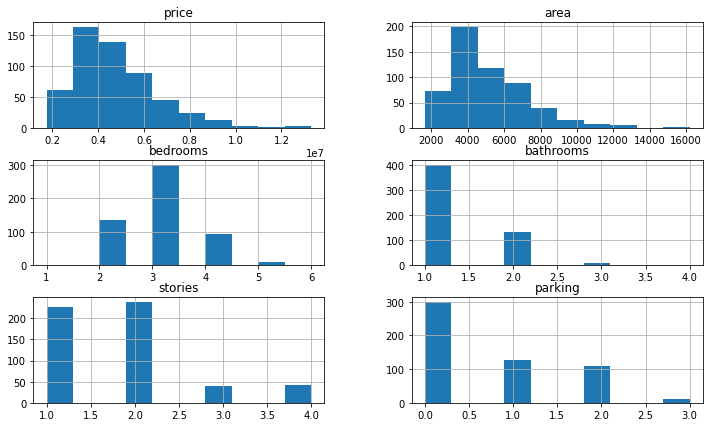

In [619]:
housing_dataset[numerical_columns].hist(bins=10,figsize=(12,7))

In [620]:
# PRICE AND AREA ARE SCEWED RIGHT DUE TO LOWER BOUND DISTRIBUTION COMPARED TO THE ELEMENTS OF THE DATASET

In [621]:
# ESTABLISH EXISTING CORRELATION BETWEEN THE NUMERIC VALUES

In [622]:
housing_dataset[numerical_columns].corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [623]:
# VISUALIZE EXISTING CORRELATION BETWEEN THE FEATURES OF NUMERIC DATA

<AxesSubplot:>

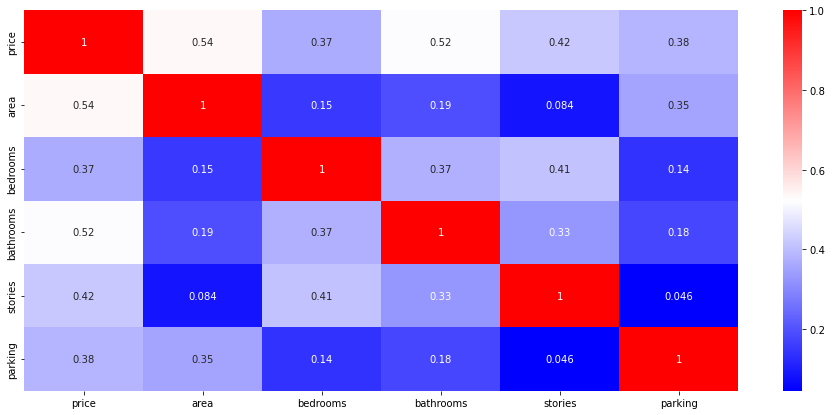

In [624]:
plt.figure(figsize=(16,7))
sns.heatmap(housing_dataset.corr(),cmap='bwr',annot=True)

In [625]:
# OBVIOUSLY THE HIGHEST CORRELATION EXISTS BETWEEN PRICE AND THE AREA

In [626]:
# OBSERVE EXISTING DISTRIBUTION ON THE "furnishingstatus" FEATURE

In [627]:
housing_dataset['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [628]:
# VISUALIZE DISTRBUTION ACCROSS DATASET

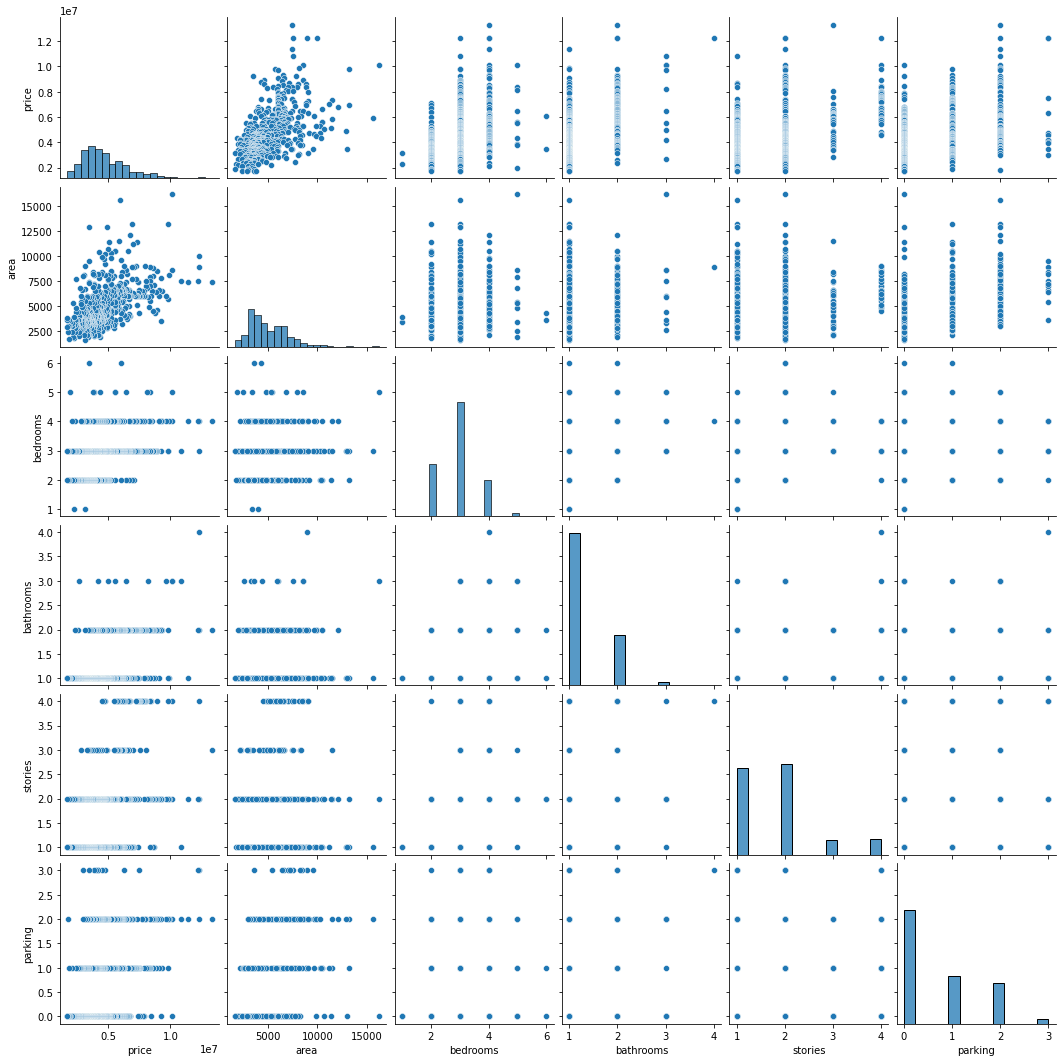

In [629]:
sns.pairplot(housing_dataset)

In [630]:
# VISUALIZE THE DISTRIUTION ON THE 'furnishingstatus' FEATURE OF THE DATASET

<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

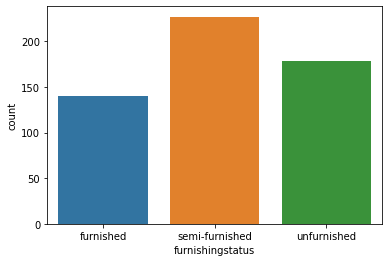

In [631]:
sns.countplot(housing_dataset['furnishingstatus'])

In [632]:
# VISUALIZE THE DISTRIBUTIION OF CATEGORICAL FEATURES

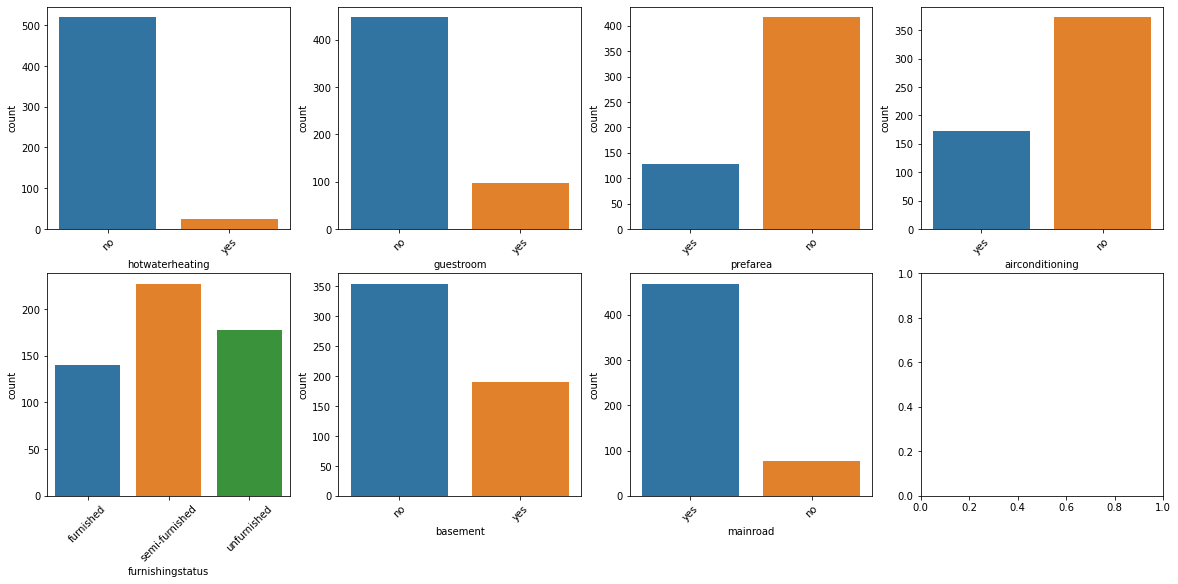

In [633]:
fig,ax = plt.subplots(2,4,figsize=(20,9))
for category, subplot in zip(categrical_columns,ax.flatten()):
    sns.countplot(housing_dataset[category],ax= subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

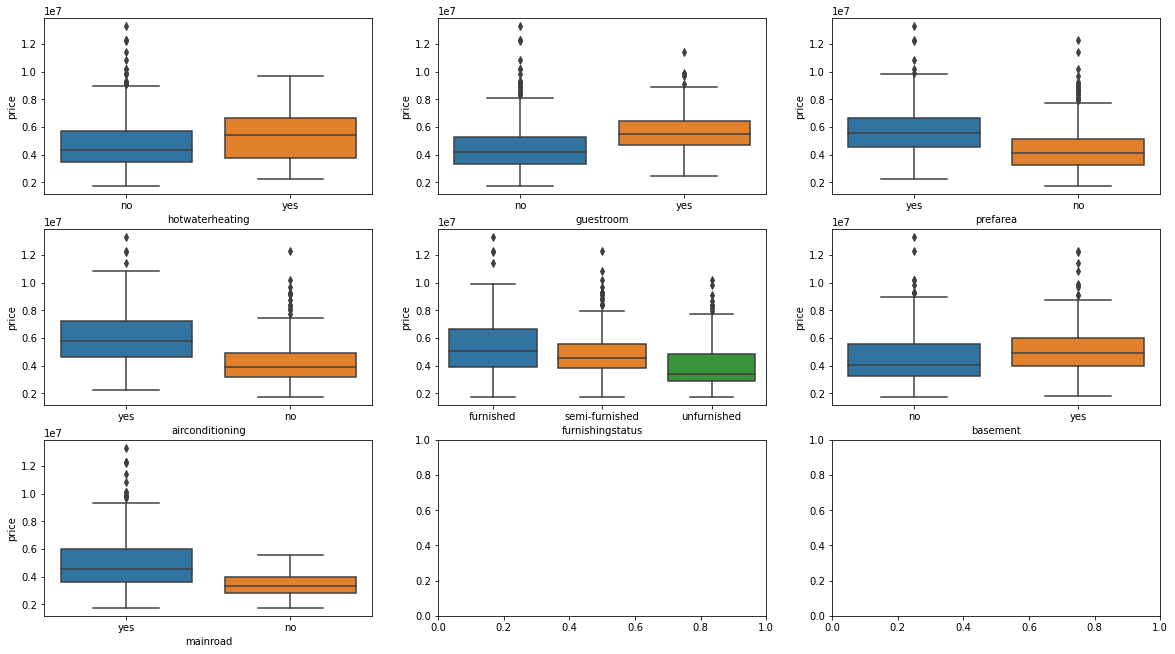

In [634]:
# ANALYZING THE RELATIONSHIP BETWEEN PRICE AND CATGORICAL VARIABLES
fig,ax = plt.subplots(3,3,figsize=(20,11))
for category, subplot in zip(categrical_columns,ax.flatten()):
    sns.boxplot(x=category, y='price',data=housing_dataset,ax=subplot)

In [635]:
# THE ABOVE VISUALIZATION SHOWS A NUMBER OF FACTORS WHICH BRING ABOUT AN INCREASE IN PRICE, SUCH AS:
#     COMPLETELY FURNISHED APPARTMENTS,
#     AVAILABILITY OF AIR CONDITIONING
#     AVAILABILITY OF GUEST ROOM
#     HOUSES CITED AT RESERVED AREAS
#     NEARNESS TO MAINROAD
#     AVAILABILITY OF BASEMENT
#     AVAILABILITY OF HOT WATER HEATER

In [636]:
# CLOSELY EXAMINE THE RELATIONSHIP BETWEEN "furnishingstatus" AND PRICE

<AxesSubplot:xlabel='furnishingstatus', ylabel='price'>

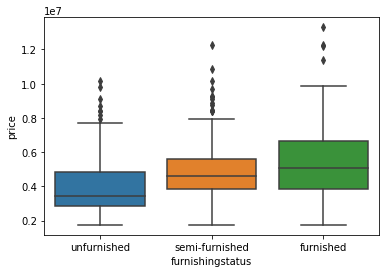

In [637]:
sorted_furnishes = housing_dataset.groupby(['furnishingstatus'])['price'].median().sort_values()
sns.boxplot(x=housing_dataset['furnishingstatus'],y=housing_dataset['price'],order=list(sorted_furnishes.index))

In [638]:
# CONVERT "furnishingstatus" FEATURES INTO NUMERIC DATA USING ONE-HOT-ENCODING

In [639]:
dummy_data = pd.get_dummies(housing_dataset['furnishingstatus'],prefix_sep='_',drop_first=False)

In [640]:
dataset = pd.concat([housing_dataset,dummy_data],axis=1)

In [641]:
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,0


In [642]:
# DROP "furnishingstatus" COLUMNS

In [643]:
# CONVERT OTHER CATEGORICAL FEATURES INTO NUMERIC SETS OF DATA

In [644]:
dataset = dataset.drop('furnishingstatus',axis=1)

In [645]:
dataset['mainroad'] = dataset['mainroad'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['guestroom'] = dataset['guestroom'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['basement'] = dataset['basement'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['hotwaterheating'] = dataset['hotwaterheating'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['airconditioning'] = dataset['airconditioning'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['prefarea'] = dataset['prefarea'].apply(lambda x : 1 if x == 'yes' else 0)
dataset['hotwaterheating'] = dataset['hotwaterheating'].apply(lambda x : 1 if x == 'yes' else 0)

In [646]:
# VIEW MODELLING - READY DATA

In [647]:
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0


In [648]:
# DISTRIBUTE DATA INTO TRAINING AND TEST SET

In [649]:
train_data = dataset.drop('price',axis=1)

In [650]:
test_data = dataset['price']

In [651]:
from sklearn.preprocessing import MinMaxScaler

In [652]:
scalar = MinMaxScaler()

In [653]:
train_data = scalar.fit_transform(train_data)

In [654]:
from sklearn.model_selection import train_test_split

In [655]:
X_train, X_test, y_train, y_test = train_test_split(train_data,test_data,test_size=0.2,random_state=123)

In [656]:
X_train.shape

(436, 14)

In [657]:
y_train.shape

(436,)

In [658]:
X_test.shape

(109, 14)

In [659]:
y_test.shape

(109,)

In [660]:
# IMPORT LINEAR REGRESSION MODEL

In [661]:
from sklearn.linear_model import LinearRegression

In [662]:
model = LinearRegression()

In [663]:
model.fit(X_train,y_train)

LinearRegression()

In [664]:
model.coef_

array([ 3.71508962e+06,  4.23632145e+05,  2.97816491e+06,  1.26658038e+06,
        3.35794862e+05,  3.50293572e+05,  2.90991373e+05, -3.49245965e-10,
        9.35720465e+05,  8.26678460e+05,  7.72697111e+05,  1.36847906e+05,
        1.20978422e+05, -2.57826328e+05])

In [665]:
model.intercept_

1940057.1648811055

In [666]:
y_pred = model.predict(X_test) 

In [667]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [668]:
mse = mean_squared_error(y_test,y_pred)

In [669]:
mse

1304034449908.4355

In [670]:
np.sqrt(mse)

1141943.2778857432

In [671]:
r2_score(y_test,y_pred)

0.6019517786861872

In [672]:
# PERFORM HYPERPARAMETER TUNING TO DETERMINE THE OPTIMAL VALUE OF THE FOLLOWING MODELS: Lasso Regression, Ridge Reression
# and DecisioTreeRegressor

In [673]:
from sklearn.model_selection import ShuffleSplit

In [674]:
from sklearn.model_selection import cross_val_score

In [675]:
from sklearn.model_selection import GridSearchCV

In [676]:
from sklearn.linear_model import Lasso

In [677]:
from sklearn.tree import DecisionTreeRegressor

In [678]:
from sklearn.linear_model import Ridge

In [679]:
def compare_models(training_dataset,test_dataset):
    algorithms = {
        'ridge' : {
            'model' : Ridge(),
            'params' : {
                'alpha' : [50],
                'max_iter' :[100],
                'tol' : [0.1]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random'],
                'max_depth' : [3],
                'min_samples_split' : [3]
            }
        }
    }
    scores = []
    # CONDUCT RANDOM PERMUTATION CROSS VALIDATOR
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo, config in algorithms.items():
        grid_search = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        grid_search.fit(training_dataset,test_dataset)
        scores.append({
            'model': algo,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
compare_models(train_data,test_data)

,model,best_score,best_params
0,ridge,0.529897,"{'alpha': 50, 'max_iter': 100, 'tol': 0.1}"
1,lasso,0.658387,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.404087,"{'criterion': 'friedman_mse', 'max_depth': 3, ..."


In [680]:
# Explore Lasso regression as it show some significant best_sore value

In [681]:
from sklearn.linear_model import Lasso

In [682]:
lasso_model = Lasso(alpha=2,selection='cyclic')

In [683]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=2)

In [684]:
lasso_pred = lasso_model.predict(X_test)

In [685]:
r2_score(y_test,lasso_pred)

0.6019514625995928

In [686]:
# LINEAR REGRESSION ULTIMATELY PERFORMS BETTER IN PREDICTING THE PRICES OF HOUSES